<a href="https://colab.research.google.com/github/Carmodann1311/mineria-de-datos/blob/main/tarea_equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://archivo.datos.cdmx.gob.mx/C5/incidentes_viales/inViales_2022_2024.csv

--2024-10-29 23:02:12--  https://archivo.datos.cdmx.gob.mx/C5/incidentes_viales/inViales_2022_2024.csv
Resolving archivo.datos.cdmx.gob.mx (archivo.datos.cdmx.gob.mx)... 189.240.234.120
Connecting to archivo.datos.cdmx.gob.mx (archivo.datos.cdmx.gob.mx)|189.240.234.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104188755 (99M) [text/csv]
Saving to: ‘inViales_2022_2024.csv’

inViales_2022_2024. 100%[===================>]  99.36M  21.3MB/s    in 5.2s    

2024-10-29 23:02:18 (19.2 MB/s) - ‘inViales_2022_2024.csv’ saved [104188755/104188755]



In [2]:
import pandas as pd
data = pd.read_csv('/content/inViales_2022_2024.csv')

In [4]:
data.head()

,folio,fecha_creacion,hora_creacion,dia_semana,fecha_cierre,hora_cierre,tipo_incidente_c4,incidente_c4,alcaldia_inicio,codigo_cierre,clas_con_f_alarma,tipo_entrada,alcaldia_cierre,alcaldia_catalogo,colonia_catalogo,longitud,latitud
0,C2C/20211229/00212,2021-12-29,23:21:20,Miércoles,2022-01-01,00:24:06,Lesionado,Atropellado,NaN,I,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,NaN,Cuauhtémoc,Roma Norte,-99.163670,19.421610
1,C2C/20211231/00183,2021-12-31,23:48:03,Viernes,2022-01-01,06:29:52,Lesionado,Atropellado,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,Cuauhtémoc,Obrera,-99.144270,19.409910
2,C2C/20220101/00012,2022-01-01,01:06:39,Sábado,2022-01-01,06:00:12,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,Cuauhtémoc,Doctores,-99.148320,19.415250
3,C2C/20220101/00070,2022-01-01,09:51:53,Sábado,2022-01-01,12:54:10,Accidente,Motociclista,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,Miguel Hidalgo,Tlaxpana,-99.165781,19.443649
4,C2N/20211231/00128,2021-12-31,23:03:05,Viernes,2022-01-01,06:16:42,Accidente,Choque sin lesionados,IZTACALCO,A,EMERGENCIA,BOTÓN DE AUXILIO,IZTACALCO,Iztacalco,Agricola Pantitlan,-99.060450,19.414620


In [5]:
data_cleaned = data.dropna()

In [10]:

# Paso 2: Convertir columnas de fechas a tipo datetime
data_cleaned['fecha_creacion'] = pd.to_datetime(data_cleaned['fecha_creacion'], errors='coerce')
data_cleaned['fecha_cierre'] = pd.to_datetime(data_cleaned['fecha_cierre'], errors='coerce')

<ipython-input-10-2d5acb9749cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['fecha_creacion'] = pd.to_datetime(data_cleaned['fecha_creacion'], errors='coerce')
<ipython-input-10-2d5acb9749cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['fecha_cierre'] = pd.to_datetime(data_cleaned['fecha_cierre'], errors='coerce')


In [11]:
# Crear una columna para la hora extraída de `hora_creacion`
data_cleaned['hora'] = pd.to_datetime(data_cleaned['hora_creacion'], format='%H:%M:%S').dt.hour

<ipython-input-11-a1bd70fdb16c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['hora'] = pd.to_datetime(data_cleaned['hora_creacion'], format='%H:%M:%S').dt.hour


In [12]:
# Paso 3: Convertir la columna `dia_semana` a categórica numérica
data_cleaned['dia_semana'] = data_cleaned['dia_semana'].astype('category').cat.codes

<ipython-input-12-9a20d2ff0c35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['dia_semana'] = data_cleaned['dia_semana'].astype('category').cat.codes


In [13]:
# Mostrar la estructura después de la limpieza
print("Datos después de la limpieza:")
print(data_cleaned.info())

Datos después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 492856 entries, 1 to 504260
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   folio              492856 non-null  object        
 1   fecha_creacion     492856 non-null  datetime64[ns]
 2   hora_creacion      492856 non-null  object        
 3   dia_semana         492856 non-null  int8          
 4   fecha_cierre       492856 non-null  datetime64[ns]
 5   hora_cierre        492856 non-null  object        
 6   tipo_incidente_c4  492856 non-null  object        
 7   incidente_c4       492856 non-null  object        
 8   alcaldia_inicio    492856 non-null  object        
 9   codigo_cierre      492856 non-null  int8          
 10  clas_con_f_alarma  492856 non-null  object        
 11  tipo_entrada       492856 non-null  object        
 12  alcaldia_cierre    492856 non-null  object        
 13  alcaldia_catalogo  

<ipython-input-16-cdc70e85fddb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['fecha_creacion'] = pd.to_datetime(data_cleaned['fecha_creacion'], errors='coerce')
<ipython-input-16-cdc70e85fddb>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['hora'] = pd.to_datetime(data_cleaned['hora_creacion'], format='%H:%M:%S').dt.hour
<ipython-input-16-cdc70e85fddb>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Coeficiente de determinación (R^2): 0.67


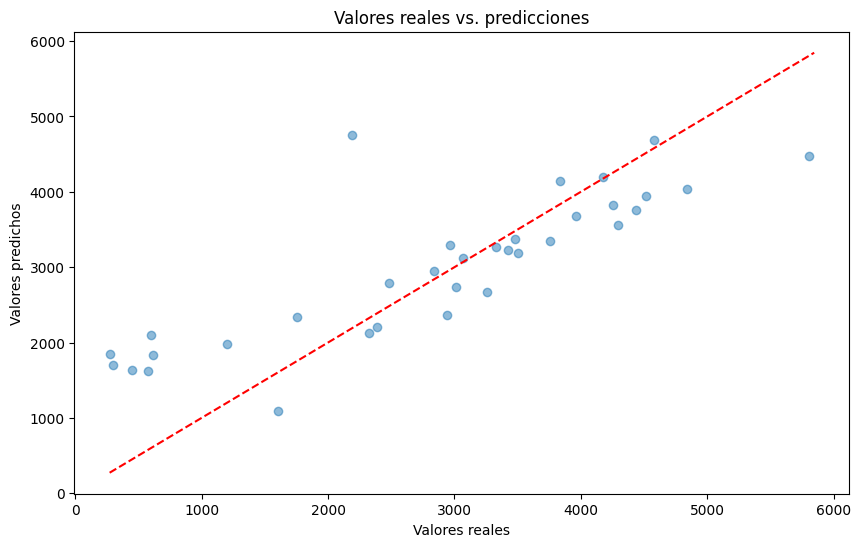

In [16]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Cargar los datos
file_path = '/content/inViales_2022_2024.csv'  # Cambia la ruta si es necesario
data = pd.read_csv(file_path)

# Paso 1: Eliminar filas con valores nulos
data_cleaned = data.dropna()

# Paso 2: Convertir fechas y extraer características de interés
data_cleaned['fecha_creacion'] = pd.to_datetime(data_cleaned['fecha_creacion'], errors='coerce')
data_cleaned['hora'] = pd.to_datetime(data_cleaned['hora_creacion'], format='%H:%M:%S').dt.hour
data_cleaned['dia_semana'] = data_cleaned['dia_semana'].astype('category').cat.codes

# Paso 3: Agrupar por día de la semana y hora para obtener la frecuencia de incidentes
incidentes_por_dia_hora = data_cleaned.groupby(['dia_semana', 'hora']).size().reset_index(name='frecuencia_incidentes')

# Definir variables predictoras (X) y la variable objetivo (y)
X = incidentes_por_dia_hora[['dia_semana', 'hora']]
y = incidentes_por_dia_hora['frecuencia_incidentes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R^2): {r2:.2f}")

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores reales vs. predicciones")
plt.show()


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calcular el Coeficiente de Determinación (R^2)
r2 = r2_score(y_test, y_pred)

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el Error Cuadrático Medio (MSE) y la Raíz del Error Cuadrático Medio (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Mostrar los resultados
print(f"Coeficiente de determinación (R^2): {r2:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")


Coeficiente de determinación (R^2): 0.67
Error Absoluto Medio (MAE): 627.48
Error Cuadrático Medio (MSE): 704386.65
Raíz del Error Cuadrático Medio (RMSE): 839.28
